## 项目说明
拿到了某保险公司的数据，用逻辑回归对保险的购买行为进行分析。
## 项目要求
1,使用Python建立逻辑回归模型；
2，预测用户是否会购买保险；
3，找到对用户行为影响较大的因素。
## 项目流程
数据分析流程：
数据概况分析
单变量分析
相关和可视化分析
逻辑回归模型的建立、评估、优化
## 数据认识
该数据来源于datafountain，
用户信息包括：ID、组内成员的年龄、是否是房主、车龄、车的价值、婚姻状态，风险评估等
消费行为包括：买过多久的保险，保险的有效期，花费等
预测结果：也就是本次项目的任务，预测用户是否会购买保险

In [1]:
# 调包
import pandas as pd
import numpy as np
#散点图
import seaborn as sns
#可视化
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# 导入数据和数据的整体概况
data=pd.read_csv('C:/Users/GaoYi/jupyter-notebook/train.csv')
data              

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,685


In [3]:
data.info()
# customer_ID无用
# car_value是类别变量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [4]:
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [5]:
#统计数据表格缺失值的个数
data.isnull().sum()


customer_ID               0
shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value              1531
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [10]:
# 数据量比较大，所以我直接删除了包含空值的行
data_droprows=data.dropna() #删除包含缺失值的行
data1=data_droprows

In [40]:
# 将ID这一列设为index
data1 = data1.set_index('customer_ID')

In [11]:
#数据表格的统计分析
data1.describe()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,4.174470e+05,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,...,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000,417447.000000
mean,1.007661e+07,4.267471,0.149133,1.948587,12275.645248,1.249184,0.594186,7.717696,2.559003,48.032181,...,2.596406,6.679780,0.954928,0.466493,2.451794,2.570264,0.490225,1.101584,2.404138,632.695010
std,4.403242e+04,2.397240,0.356220,1.452714,1552.833289,0.470781,0.491050,5.637517,1.112997,17.878804,...,1.007123,4.825717,0.568967,0.498877,0.973004,0.684091,0.499905,0.933465,0.901338,46.219299
min,1.000000e+07,1.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003858e+07,2.000000,0.000000,1.000000,10965.000000,1.000000,0.000000,3.000000,2.000000,31.000000,...,2.000000,3.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,601.000000
50%,1.007637e+07,4.000000,0.000000,2.000000,12037.000000,1.000000,1.000000,7.000000,3.000000,49.000000,...,3.000000,6.000000,1.000000,0.000000,3.000000,3.000000,0.000000,1.000000,2.000000,631.000000
75%,1.011489e+07,6.000000,0.000000,3.000000,13427.000000,1.000000,1.000000,11.000000,4.000000,64.000000,...,3.000000,10.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,662.000000
max,1.015272e+07,13.000000,1.000000,6.000000,16580.000000,4.000000,1.000000,85.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,911.000000


## EDA和数据清洗

关键列record_type的分布

In [12]:
#关键列
data1['record_type'].value_counts(1)
# 购买保险和未购买保险的数据不平衡
# 之后可能要进行下采样或者上采样

0    0.850867
1    0.149133
Name: record_type, dtype: float64

In [13]:
data1['record_type'].value_counts(1)
tmp1 = pd.DataFrame(data1['record_type'].value_counts(1)).reset_index().rename(columns={'index':'flag','record_type':'rate'})
tmp1

,flag,rate
0,0,0.850867
1,1,0.149133


<AxesSubplot:xlabel='flag', ylabel='rate'>

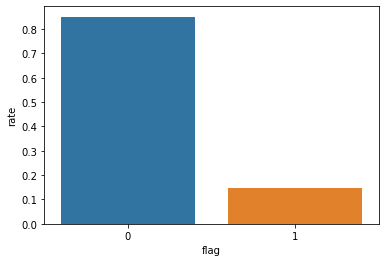

In [14]:
sns.barplot(x='flag', y='rate', data=tmp1)

group_size组员的分布

<AxesSubplot:xlabel='flag', ylabel='rate'>

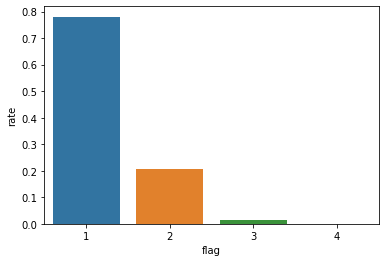

In [16]:
# group_size组员的分布
data1['group_size'].value_counts(1)
tmp2 = pd.DataFrame(data1['group_size'].value_counts(1)).reset_index().rename(columns={'index':'flag','group_size':'rate'})
tmp2
sns.barplot(x='flag', y='rate', data=tmp2)


<AxesSubplot:xlabel='flag', ylabel='rate'>

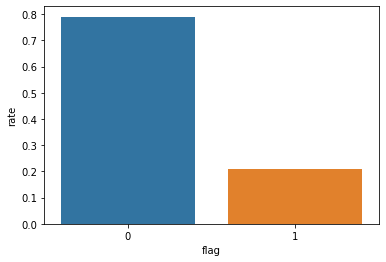

In [17]:
data1['married_couple'].value_counts(1)
tmp3 = pd.DataFrame(data1['married_couple'].value_counts(1)).reset_index().rename(columns={'index':'flag','married_couple':'rate'})
tmp3
sns.barplot(x='flag', y='rate', data=tmp3)

### 数值变量

车龄car_age的分布

C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='car_age', ylabel='Density'>

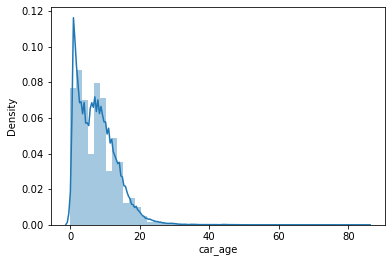

In [30]:
data1['car_age'].describe()
sns.distplot(data1['car_age'])
# 车龄主要分布在0-20之间
# 大于20的可能是异常值，要去除一下



<AxesSubplot:ylabel='car_age'>

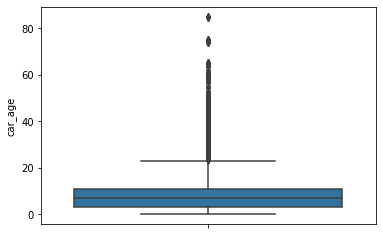

In [31]:
sns.boxplot(y='car_age', data=data1)
# 规定大于75%+四分位差的1.5倍为异常值

In [32]:
#处理异常值
newmax =data1['car_age'].describe()['75%'] + 1.5*(data1['car_age'].describe()['75%']-data1['car_age'].describe()['25%']) 
print(newmax)
data1[data1['car_age']>newmax]['car_age'].count()
# 75%+四分位差的1.5倍为23，大于23的为异常值
# 去除异常值
data1 = data1[data1['car_age']<=newmax]

23.0


In [33]:
# 查看车龄和是否购买保险的关系
data1.groupby('record_type')['car_age'].describe()

,count,mean,std,min,25%,50%,75%,max
record_type,,,,,,,,
0,351057.0,7.453596,5.082802,0.0,3.0,7.0,11.0,23.0
1,61494.0,7.495317,5.107690,0.0,3.0,7.0,11.0,23.0


C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36710 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib

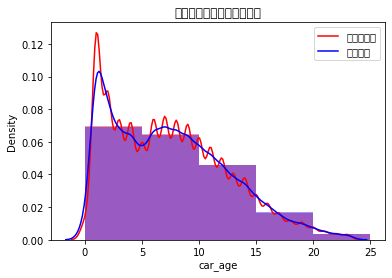

In [34]:
bins = [0, 5, 10, 15, 20, 25]
sns.distplot(data1[data1['record_type']==0]['car_age'], bins=bins, color='red')
sns.distplot(data1[data1['record_type']==1]['car_age'], bins=bins, color='blue')
plt.title('不同车龄的使用优惠券情况')
plt.legend(['未购买保险','购买保险'])

购买保险的用户车龄主要集中在0-25之间
车龄在1-3之间的用户更倾向于不购买保险


C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_previous', ylabel='Density'>

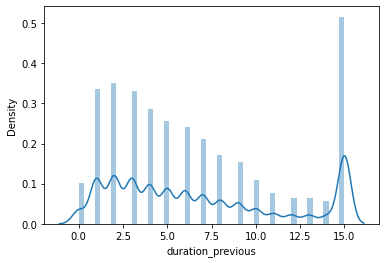

In [35]:
sns.distplot(data1['duration_previous'])

### 类别变量

In [36]:
data1['car_value'].value_counts()

e    134694
f    113284
d     68007
g     63306
h     19996
c     10269
i      2826
b       118
a        51
Name: car_value, dtype: int64

Text(0.5, 1.0, '汽车价值分级')

C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36710 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GaoYi\anaconda\envs\baoxian\lib\site-packages\matplotlib

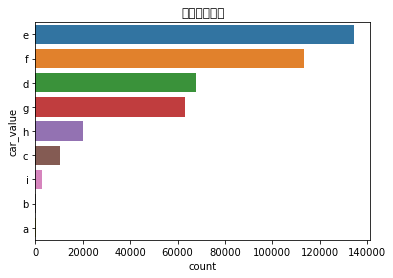

In [37]:
sns.countplot(y='car_value',data=data1, order=data1['car_value'].value_counts().sort_values(ascending=False).index)
plt.title('汽车价值分级')

### 相关系数分析

In [41]:
# 将所有的类别型变量转换为数值型变量
data1 = pd.get_dummies(data1,drop_first=True)
data1.head()

,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,...,state_WV,state_WY,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
customer_ID,,,,,,,,,,,,,,,,,,,,,
10000000,1,0,0,10001,2,0,2,3.0,46,42,...,0,0,0,0,0,0,0,1,0,0
10000000,2,0,0,10001,2,0,2,3.0,46,42,...,0,0,0,0,0,0,0,1,0,0
10000000,3,0,0,10001,2,0,2,3.0,46,42,...,0,0,0,0,0,0,0,1,0,0
10000000,4,0,0,10001,2,0,2,3.0,46,42,...,0,0,0,0,0,0,0,1,0,0
10000000,5,0,0,10001,2,0,2,3.0,46,42,...,0,0,0,0,0,0,0,1,0,0


In [38]:
分析record_type与其他变量的相关性
data1.corr()[['record_type']].sort_values('record_type',ascending=False)


,record_type
record_type,1.000000
shopping_pt,0.450990
D,0.039839
day,0.031723
C,0.017759
E,0.013933
B,0.013719
duration_previous,0.011469
A,0.008404
G,0.007203


可以看出，除了shopping_pt（正相关），其他变量与record_type的相关性都很小。

<AxesSubplot:>

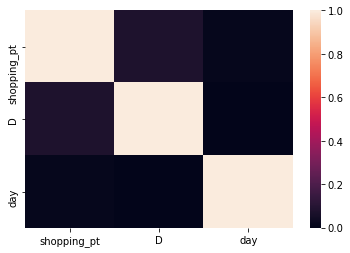

In [39]:
#热力图
q=['shopping_pt','D','day']
sns.heatmap(data1[q].corr())

## 逻辑回归模型

In [58]:
# 模型建立
# 1，设定x和y变量
y = data1['record_type']
x = data1[['shopping_pt','D','day','cost']]

In [68]:
# 2，随机抽取训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [60]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=7)

In [61]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

In [62]:
# 输出模型拟合的截距
lr.intercept_

array([-0.09728188])

In [63]:
# 输出模型拟合的系数
lr.coef_


array([[ 0.59025335, -0.06669539,  0.05264968, -0.00744226]])

### 模型评估
分别对训练集和测试集建立混淆矩阵，并计算各自的准确率

In [64]:
# 基于模型的结果，对训练集和测试集中的x的真实值预测对应的y
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

In [65]:
# 搭建训练集混淆矩阵
import sklearn.metrics as metrics 
metrics.confusion_matrix(y_train,y_pred_train)

array([[237806,   7849],
       [ 31953,  11177]], dtype=int64)

In [71]:
# 计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.8621742819052236

In [73]:
# 搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[102051,   3351],
       [ 13530,   4834]], dtype=int64)

In [74]:
# 计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.8636055136305609

发现训练集的准确率为0.8622，测试集的准确率为0.8636，
可以看到测试集中共有18364人实际购买了保险，但预测结果中只有4834人购买了保险，说明查全率偏低，模型效果不是很理想，需要进一步优化。

### 模型优化
方向：
1，调整参数，可以将测试集比例从0.3调整至0.5；
2，调整变量，可以选择与更多的变量放入模型；
3，数据处理，离群值处理，数据分组，如对年龄进行分组。